In [9]:
##############################################################################
#
# This code is part of the publication:
# https://www.biorxiv.org/content/10.1101/2020.11.30.403840v1
#
# The generation of cortical novelty responses through inhibitory plasticity
# Auguste Schulz*, Christoph Miehl*, Michael J. Berry II, Julijana Gjorgjieva
#
# * equal contribution
#
##############################################################################

# Figure 4

Author: Auguste Schulz  
1. Weight evolution
2. Weight matrices

In [1]:
from IPython.display import HTML, IFrame, Image

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os, fnmatch
import time
import h5py
from scipy.signal import find_peaks, peak_prominences
from scipy import stats
from scipy import optimize
from scipy.signal import decimate
from scipy import signal
import gc
import time

%matplotlib inline


from matplotlib import rcParams, cm
rcParams['grid.linewidth'] = 0
rcParams['pdf.fonttype'] = 42
# import custom functions
from helper_functions import *
import helper_functions

from helper_functions import *

from evaluation_functions import *
import evaluation_functions

from evaluation_functions import *

In [2]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

def get_time_idx(time, onsets):
    idx = []
    for tt in onsets:
        #print(tt)
        #print(min(min(np.where(tt<=time))))
        idx.append(min(min(np.where(time>=tt))))
        
    return idx

figsize_cm = (20,10)
figsize_inch = cm2inch(figsize_cm)
figsize_inch

(7.874015748031496, 3.937007874015748)

In [3]:
file_names = [
    "INHIB_0.1__ifinhibhetero_false_dur1.0015e6msNblocks10Ntrain5lenstim300lenpause0Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1.0Time2020-02-24-19-15-34repeatedsequences.h5",
]

In [4]:
E_all  = []
I_all = []
Xweight_all = []
ItoAweight_all = []
timevector_all = []
avgweightEmem_all = []
avgweightImem_all = []
avgweightEnov_all = []
avgweightImem_all = []
avgwindow = 4
timestr = time.strftime("%Y-%m-%d-%H-%M-%S")


RUN_DIR = "../data/"
RESULTS_DIR = "../results/"

FILE_NAME_RUN = [RUN_DIR + file_name for file_name in file_names]
#file_name_run = run_folder + file_name
# open file
frun = h5py.File(FILE_NAME_RUN[0], "r")

FILE_NAME_RUN[-1]
dict_dursimspikes_last  = frun["dursimspikes"]
dict_dursimspikes_keys = dict_dursimspikes_last.keys()
dict_dursimspikes_keys;
adjustfact  = frun["params"]['adjustfactorinhib2'].value
stimulus  = frun["initial"]['stimulus'].value
ptretrain  = frun["initial"]['lengthpretrain'].value

print(stimulus[:,-1])
print(stimulus[2,ptretrain])
dict_dursimspikes_last= frun["dursimspikes"].keys()
dict_dursimspikes_last;
print(frun["initial"].keys())

[6.0000e+00 1.0012e+06 1.0015e+06 1.2000e+01]
101800.0
<KeysViewHDF5 ['assemblymembers', 'idxblockonset', 'inhibassemblies', 'lengthpretrain', 'seqnumber', 'stimparams', 'stimparams_prestim', 'stimulus', 'weights']>


/home/auguste/Software/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [5]:
frun["params"].keys()

<KeysViewHDF5 ['Connectivity', 'MembraneDynamics', 'Ne', 'Ni', 'Normdt', 'STDPwadapt', 'T', 'Triplet', 'TripletTausAs', 'TripletTausAs_stim', 'adjustfactor', 'adjustfactor2', 'adjustfactorinhib', 'adjustfactorinhib2', 'bwfactor', 'dtsaveweights', 'eta_stim', 'iSTDP', 'minwstore', 'modwstore', 'stronginputs', 'voltageSTDP', 'weakfactor', 'weakfrac', 'weakidx']>

In [6]:
for i,fn in enumerate(file_names):
    E,I, ed, E_hist, E_hist_boxcar, FIG_DIR = analyse_mechanism(fn, avgwindow=avgwindow, timestr=timestr, RUN_DIR = RUN_DIR, RESULTS_DIR=RESULTS_DIR)
    print(fn)
    Xweight, ItoAweight, timevector_weights, avgweightEmem, avgweightImem, avgweightEnov, avgweightImem, It1, It2, InhibXweight, seqnumber, stimulus, colormain, idxblockonset= analyse_weights(fn, True, figsize=(10,5), RUN_DIR = RUN_DIR, RESULTS_DIR=RESULTS_DIR)
    #run_single_neuron_eval_SSA(fn, binwidth = 50, avgwindow = avgwindow, timestr = timestr)

    gc.collect()
spiketimes = 0
gc.collect()

NON ADAPTIVE
INHIB_0.1__ifinhibhetero_false_dur1.0015e6msNblocks10Ntrain5lenstim300lenpause0Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1.0Time2020-02-24-19-15-34repeatedsequences.h5


0

# Get onset times to calculate average

In [7]:
Nseq = 5
Nblocks = 10 
cutfoff = 20
Nimg = 3
seq = 0

onset_times = stimulus[1,idxblockonset]
all_onsets = [] # list for each sequence individually
for i in range(1,Nseq+1):
    all_onsets.append(onset_times[seqnumber==i]/1000)
blocklen = all_onsets[1][0]-all_onsets[0][0]
time_weights = timevector_weights*60
idx_1 = get_time_idx(time_weights, all_onsets[0]) # onset indices of seqeunce 1 
idx_2= get_time_idx(time_weights, all_onsets[1]) # onset indices of seqeunce 2
block_idx = idx_2[0]-idx_1[0] # number of timesteps per block

range(0, 3)
(500,)
range(3, 6)
(500,)
range(6, 9)
(500,)
range(9, 12)
(500,)
range(12, 15)
(500,)


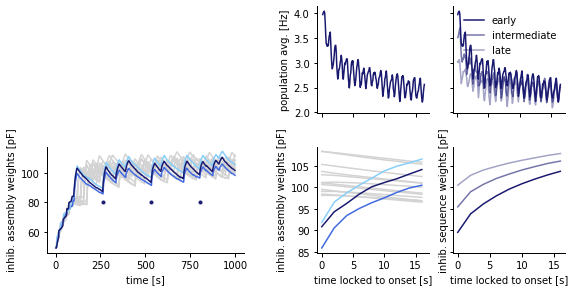

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


axiswidth=1
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
figsize_cm = (20,10)
figsize_inch = cm2inch(figsize_cm)
figsize_inch
fig2 = plt.figure(constrained_layout=True, figsize=figsize_inch)
gs = fig2.add_gridspec(2, 24, hspace=0.5)

f2_ax1 = fig2.add_subplot(gs[1, 0:9])

f2_ax2 = fig2.add_subplot(gs[0, 10:17])

f2_ax3 = fig2.add_subplot(gs[1, 10:17], sharex=f2_ax2)

f2_ax4 = fig2.add_subplot(gs[0, 17:], sharey=f2_ax2)

f2_ax5 = fig2.add_subplot(gs[1, 17:], sharey=f2_ax3)

plt.setp(f2_ax4.get_yticklabels(), visible=False)
plt.setp(f2_ax5.get_yticklabels(), visible=False)
plt.setp(f2_ax2.get_xticklabels(), visible=False)
plt.setp(f2_ax4.get_xticklabels(), visible=False)

for aa, ax in enumerate([f2_ax1,f2_ax2,f2_ax3,f2_ax4,f2_ax5]):
    for axis in ['bottom', 'left']:
            ax.spines[axis].set_linewidth(axiswidth)
    for axis in ['top', 'right']:
        ax.spines[axis].set_linewidth(0)
    ax.xaxis.set_tick_params(width=axiswidth)
    ax.yaxis.set_tick_params(width=axiswidth)
    ax.locator_params(tight=True, nbins=5)

# ===============================================0 begin plotting ===============================================

color = ["midnightblue","lightskyblue","royalblue","darkred","darksalmon", "saddlebrown","darkgreen","greenyellow","darkolivegreen","darkmagenta","thistle","indigo","darkorange","tan","sienna", "black", "silver","dimgrey", "fuchsia", "orchid","plum",  "lightseagreen", "lightcyan", "darkslategray",  "goldenrod","gold", "wheat","forestgreen", "aquamarine", "palegreen"]

colormain = np.copy(color[0:-1:Nimg])
ncol=3
Nass=Nimg*Nseq
startidx = []
seqnum = Nseq + 1
timevector = timevector_weights*60
blocks=[1,4,7]

for i in reversed(range(0,Nass)):
    if i in startidx:#if i == startidx or i == startidx+Nimg or i == startidx+2*Nimg or i == startidx+3*Nimg or i == startidx+4*Nimg or i == startidx+5*Nimg or i == startidx+6*Nimg or i == startidx+7*Nimg or i == startidx+8*Nimg or i == startidx+9*Nimg or i == startidx+10*Nimg or i == startidx+11*Nimg or i == startidx+12*Nimg or i == startidx+13*Nimg or i == startidx+14*Nimg or i == startidx+15*Nimg:
        seqnum -= 1
        f2_ax1.plot(timevector, ItoAweight[i,:], label = "assemblies seq. %d" % (seqnum), color = color[i])#, ifcolor = True, lw = 1,fontsize = 20, xlabel = "time [min]", ylabel ="winhib [pF]", ifioff = True, ncol = ncol)
    elif i < 3:#Nimg*Nseq:
        f2_ax1.plot(timevector, ItoAweight[i,:], color = color[i])#, ifcolor = True, lw = 1,fontsize = 20, xlabel = "time [min]", ylabel ="winhib [pF]", ifioff = True)
    elif i == Nimg*Nseq:
        f2_ax1.plot(timevector, ItoAweight[i,:], label = "other sequence assemblies", color = "lightgrey")#,iflegend = True, color = "lightgrey", ifcolor = True, lw = 1,fontsize = 20, xlabel = "time [min]", ylabel ="winhib [pF]", ifioff = True, ncol = ncol)
    else:
        f2_ax1.plot(timevector, ItoAweight[i,:], color = "lightgrey")#, iflegend = False, color = "lightgrey", ifcolor = True, lw = 1,fontsize = 20, xlabel = "time [min]", ylabel ="winhib [pF]", ifioff = True, ncol = ncol)


for bb, bl in enumerate(blocks):
    f2_ax1.plot(timevector[idx_1[bl]], 80*np.ones_like(timevector[idx_1[bl]]), '.',color='midnightblue')  
        
#plt.legend(frameon=False)
f2_ax1.set(xlabel = "time [s]", ylabel ="inhib. assembly weights [pF]")
#plt.tight_layout()

#============================================== weight zoom in ==============================================
legend_label=['early', 'intermediate', 'late']
blocks=[1]#,4,7]
block_alpha=[1,0.6,0.4]


for bb, bl in enumerate(blocks):
    f2_ax2.plot(ed[2:-cutfoff], E_hist_boxcar[seq][bl][2:-cutfoff], color='midnightblue', label=legend_label[bb], alpha=block_alpha[bb])#plt.legend()
#f2_ax2.legend(frameon=False)
f2_ax2.set(ylabel ="population avg. [Hz]")
bl=1
for i in reversed(range(0,Nass)):
    if i in startidx:#if i == startidx or i == startidx+Nimg or i == startidx+2*Nimg or i == startidx+3*Nimg or i == startidx+4*Nimg or i == startidx+5*Nimg or i == startidx+6*Nimg or i == startidx+7*Nimg or i == startidx+8*Nimg or i == startidx+9*Nimg or i == startidx+10*Nimg or i == startidx+11*Nimg or i == startidx+12*Nimg or i == startidx+13*Nimg or i == startidx+14*Nimg or i == startidx+15*Nimg:
        seqnum -= 1
        f2_ax3.plot(timevector[idx_1[bl]:(idx_1[bl]+block_idx)]-timevector[idx_1[bl]], ItoAweight[i,idx_1[bl]:(idx_1[bl]+block_idx)], label = "assemblies seq. %d" % (seqnum), color = color[i])#, ifcolor = True, lw = 1,fontsize = 20, xlabel = "time [min]", ylabel ="winhib [pF]", ifioff = True, ncol = ncol)
    elif i < 3:#Nimg*Nseq:
        f2_ax3.plot(timevector[idx_1[bl]:(idx_1[bl]+block_idx)]-timevector[idx_1[bl]], ItoAweight[i,idx_1[bl]:(idx_1[bl]+block_idx)], color = color[i])#, ifcolor = True, lw = 1,fontsize = 20, xlabel = "time [min]", ylabel ="winhib [pF]", ifioff = True)
    elif i == Nimg*Nseq:
        f2_ax3.plot(timevector[idx_1[bl]:(idx_1[bl]+block_idx)]-timevector[idx_1[bl]], ItoAweight[i,idx_1[bl]:(idx_1[bl]+block_idx)], label = "other sequence assemblies", color = "lightgrey")#,iflegend = True, color = "lightgrey", ifcolor = True, lw = 1,fontsize = 20, xlabel = "time [min]", ylabel ="winhib [pF]", ifioff = True, ncol = ncol)
    else:
        f2_ax3.plot(timevector[idx_1[bl]:(idx_1[bl]+block_idx)]-timevector[idx_1[bl]], ItoAweight[i,idx_1[bl]:(idx_1[bl]+block_idx)], color = "lightgrey")#, iflegend = False, color = "lightgrey", ifcolor = True, lw = 1,fontsize = 20, xlabel = "time [min]", ylabel ="winhib [pF]", ifioff = True, ncol = ncol)

f2_ax3.set(xlabel = "time locked to onset [s]", ylabel ="inhib. assembly weights [pF]")


# ============================================= second timescale ============================================
blocks=[1,4,7]

cutfoff = 20
Nimg = 3
Nseq = 5

ItoSeqAvg = []
for i in range(Nseq):
    print(range(Nimg*i,Nimg*(i+1)))
    ItoSeqAvg.append(np.mean(ItoAweight[range(Nimg*i,Nimg*(i+1)),:],axis=0))
    print(np.mean(ItoAweight[range(Nimg*i,Nimg*(i+1)),:],axis=0).shape)
    plt.figure()

for bb, bl in enumerate(blocks):
    f2_ax5.plot(timevector[idx_1[bl]:(idx_1[bl]+block_idx)]-timevector[idx_1[bl]], ItoSeqAvg[0][idx_1[bl]:(idx_1[bl]+block_idx)], color='midnightblue', label=legend_label[bb], alpha=block_alpha[bb])
f2_ax5.set(xlabel = "time locked to onset [s]", ylabel ="inhib. sequence weights [pF]")

for bb, bl in enumerate(blocks):
    f2_ax4.plot(ed[2:-cutfoff], E_hist_boxcar[seq][bl][2:-cutfoff], color='midnightblue', label=legend_label[bb], alpha=block_alpha[bb])#plt.legend()
f2_ax4.legend(frameon=False)
save_fig("./figures/", "Figure_4_Mechanism")